In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/unsupervised')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

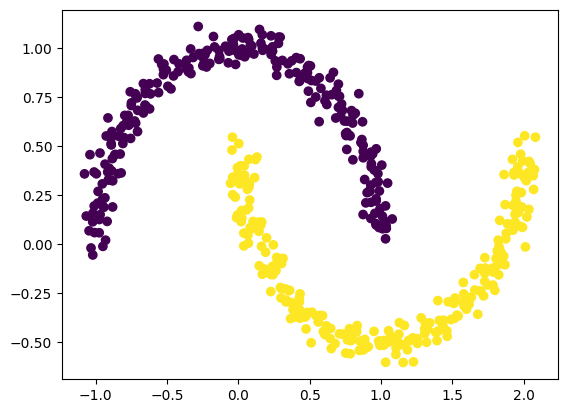

In [11]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500, noise=0.05, random_state=42)
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis')

In [5]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_scaled=std.fit_transform(X)

In [9]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, metric="euclidean")
dbscan.fit(X_scaled)
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

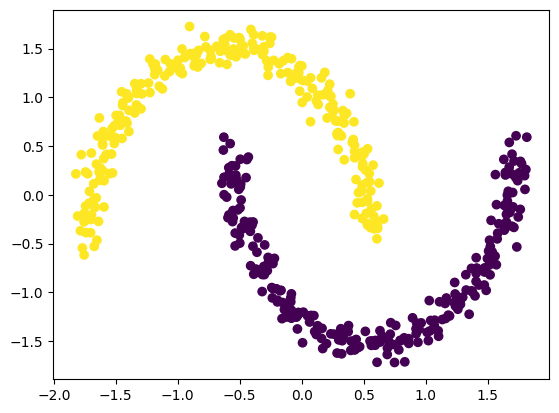

In [12]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbscan.labels_, cmap='viridis')

Could not calculate silhouette score for eps=0.7000000000000002. Unique clusters found: 1
Could not calculate silhouette score for eps=0.8000000000000003. Unique clusters found: 1


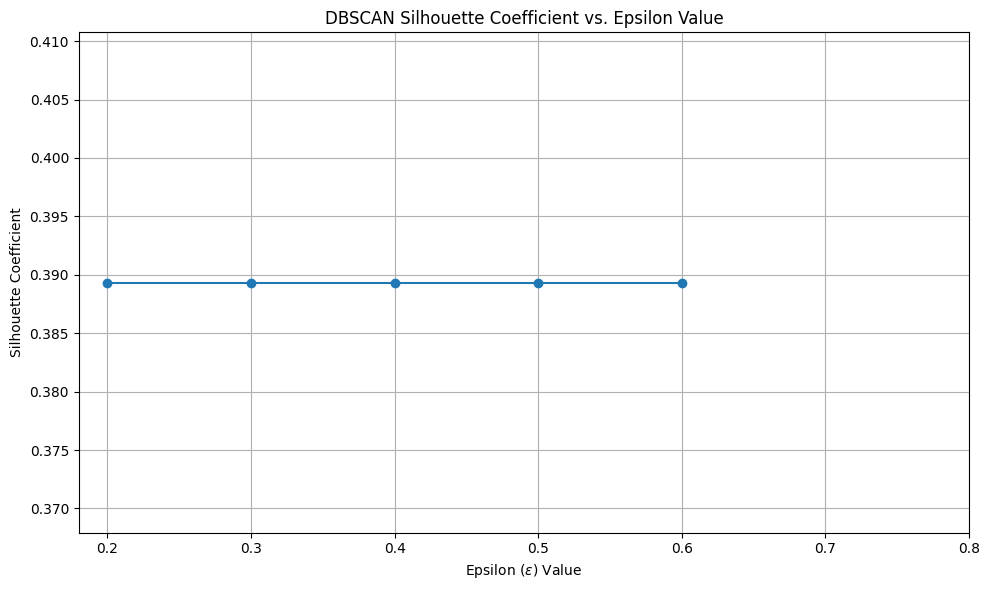

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

silhouette_coefficients = []
eps_values = np.arange(0.2, 0.8, 0.1)
# Notice you start at 2 clusters for silhouette coefficient
for k in eps_values:
    dbscan=DBSCAN(eps=k, metric="euclidean" )
    dbscan.fit(X_scaled)
    unique_labels = len(np.unique(dbscan.labels_))
    # The silhouette score requires at least 2 clusters
    # and not all points can be noise (label -1).
    if unique_labels > 1:
        score = silhouette_score(X_scaled, dbscan.labels_)
        silhouette_coefficients.append(score)
    else:
        silhouette_coefficients.append(np.nan)
        print(f"Could not calculate silhouette score for eps={k}. Unique clusters found: {unique_labels}")


plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_coefficients, marker='o')
plt.xticks(eps_values)
plt.xlabel(r"Epsilon ($\epsilon$) Value")
plt.ylabel("Silhouette Coefficient")
plt.title("DBSCAN Silhouette Coefficient vs. Epsilon Value")
plt.grid(True)
plt.tight_layout()
plt.show()